<a href="https://colab.research.google.com/github/vssvprasad/DIY-FaceApp/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# description : uses CNN to classify handwritten digits as numbers 0-9

In [ ]:
#import the libraries
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.datasets import mnist
from keras.utils import  to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# load the data and split it into train and test
(x_train,y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# get image shape
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# take a look at the first image in training dataset
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

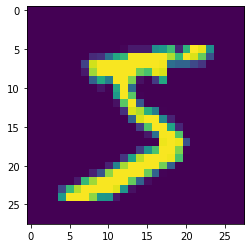

In [ ]:
# show image as picture
plt.imshow(x_train[0])

In [ ]:
# reshape the data to fit the model
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
# one hot Encoding: 
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# print new label

print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# build the CNN model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation= 'relu',input_shape= (28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation= 'relu'))
model.add(Flatten())
model.add(Dense(10, activation= 'softmax'))

In [ ]:
#compile the model
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics=['accuracy']) 

In [ ]:
# train the model
hist= model.fit(x_train, y_train_one_hot, validation_data=(x_test, y_test_one_hot), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0378 - accuracy: 0.9875 - val_loss: 0.0821 - val_accuracy: 0.9781
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0296 - accuracy: 0.9910 - val_loss: 0.1033 - val_accuracy: 0.9757
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0241 - accuracy: 0.9923 - val_loss: 0.1268 - val_accuracy: 0.9772
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0207 - accuracy: 0.9937 - val_loss: 0.1339 - val_accuracy: 0.9729
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0185 - accuracy: 0.9944 - val_loss: 0.1439 - val_accuracy: 0.9777
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0195 - accuracy: 0.9945 - val_loss: 0.1678 - val_accuracy: 0.9771
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0142 - accuracy: 0.9960 - val_loss: 0.2042 - val_accuracy:

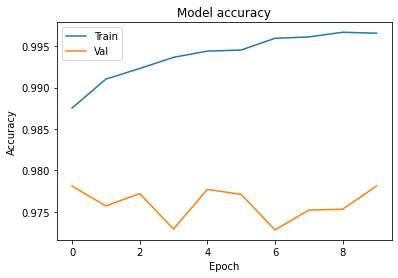

In [ ]:
# Visualise the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

In [ ]:
# show predictions as probabilities for the first 4 images in test set
predictions = model.predict(x_test[:4])
predictions

array([[1.9751864e-25, 1.5256961e-38, 2.7194471e-20, 1.7229907e-19,
        8.3562518e-35, 2.0828235e-34, 0.0000000e+00, 1.0000000e+00,
        1.8797589e-19, 5.7496501e-28],
       [3.6785684e-13, 1.0685507e-15, 1.0000000e+00, 9.6389605e-20,
        1.0876440e-32, 0.0000000e+00, 1.0689328e-17, 8.9986730e-33,
        3.1415838e-20, 1.2495560e-33],
       [5.8530215e-13, 9.9997199e-01, 3.3664422e-11, 4.3850007e-23,
        1.0835518e-08, 2.0333071e-12, 1.5036287e-15, 2.5172567e-17,
        2.7962900e-05, 6.2542868e-20],
       [1.0000000e+00, 0.0000000e+00, 5.8246752e-24, 6.6063627e-33,
        5.6353965e-25, 1.0910554e-25, 6.7964030e-22, 1.7975875e-29,
        6.3544242e-23, 4.5213490e-18]], dtype=float32)

In [ ]:
# print our predictions as number labels
print(np.argmax(predictions, axis=1))
#print actual labels
print(y_test[:4])

[7 2 1 0]
[7 2 1 0]
